In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cifar10-python/cifar-10-python.tar.gz
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_1
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_2
/kaggle/input/cifar10-python/cifar-10-batches-py/batches.meta
/kaggle/input/cifar10-python/cifar-10-batches-py/test_batch
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_3
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_5
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_4
/kaggle/input/cifar10-python/cifar-10-batches-py/readme.html


In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import matplotlib.image as mpimg
from skimage import color
from tensorflow.keras.optimizers import RMSprop

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 48s 0us/step


<function matplotlib.pyplot.show(close=None, block=None)>

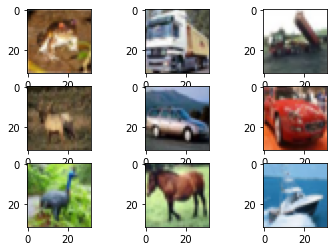

In [4]:
for i in range(9):
  plt.subplot(330 + i + 1)
  plt.imshow(X_train[i])
plt.show

In [5]:
X_train = color.rgb2gray(X_train)
print(X_train.shape)
X_test = color.rgb2gray(X_test)
print(X_test.shape)
X = X_test

(50000, 32, 32)
(10000, 32, 32)


<function matplotlib.pyplot.show(close=None, block=None)>

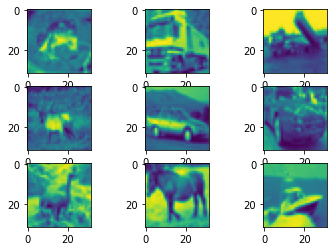

In [6]:
for i in range(9):
  plt.subplot(330 + i + 1)
  plt.imshow(X_train[i])
plt.show

In [7]:
X_train = X_train.reshape(50000, 1024)
X_test = X_test.reshape(10000, 1024)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 1024)
(10000, 1024)
(50000, 10)
(10000, 10)


In [8]:
model = Sequential()
model.add(Dense(512, activation = 'relu',input_shape=(1024,)))
model.add(Dropout(0.2))
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation = 'softmax'))
model.summary()

2022-05-16 10:43:48.689989: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-16 10:43:48.811458: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-16 10:43:48.812257: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               5

2022-05-16 10:43:48.813928: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-16 10:43:48.814283: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-16 10:43:48.815225: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-16 10:43:48.816094: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [9]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'RMSprop', metrics = ['accuracy'])

In [10]:
history = model.fit(X_train, y_train, batch_size = 128, epochs = 200, verbose = 1, validation_data = (X_test, y_test))

2022-05-16 10:43:52.919954: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200
391/391 [==============================] - 3s 5ms/step - loss: 2.1716 - accuracy: 0.2053 - val_loss: 2.0257 - val_accuracy: 0.2468
Epoch 2/200
391/391 [==============================] - 1s 4ms/step - loss: 2.0086 - accuracy: 0.2746 - val_loss: 1.9775 - val_accuracy: 0.2793
Epoch 3/200
391/391 [==============================] - 1s 4ms/step - loss: 1.9426 - accuracy: 0.3032 - val_loss: 2.0243 - val_accuracy: 0.2667
Epoch 4/200
391/391 [==============================] - 1s 4ms/step - loss: 1.9023 - accuracy: 0.3183 - val_loss: 1.9135 - val_accuracy: 0.3188
Epoch 5/200
391/391 [==============================] - 1s 4ms/step - loss: 1.8712 - accuracy: 0.3306 - val_loss: 1.8023 - val_accuracy: 0.3559
Epoch 6/200
391/391 [==============================] - 1s 4ms/step - loss: 1.8448 - accuracy: 0.3439 - val_loss: 1.8153 - val_accuracy: 0.3457
Epoch 7/200
391/391 [==============================] - 1s 4ms/step - loss: 1.8233 - accuracy: 0.3513 - val_loss: 1.8773 - val_accuracy: 0.3163

In [11]:
score = model.evaluate(X_test, y_test, verbose = 1)

313/313 [==============================] - 1s 3ms/step - loss: 1.6192 - accuracy: 0.4437


In [12]:
model.save('cifar10_ann.h5')

In [13]:
print('Test loss = ',score[0])
print('Test accuracy = ',score[1])

Test loss =  1.6192206144332886
Test accuracy =  0.44369998574256897


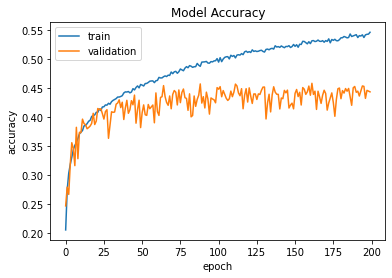

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')

In [15]:
y_pred = model.predict(X_test)

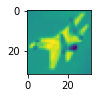

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


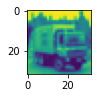

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


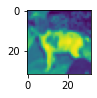

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


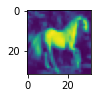

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


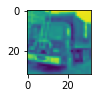

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


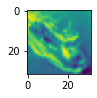

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


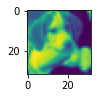

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


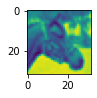

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


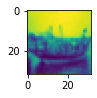

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [16]:
for i in range(9):
  plt.subplot(330 + i +1)
  plt.imshow(X[i + 10])
  plt.show()  
  print(np.round(y_pred[i + 10]))